In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

## Random Forest for Bechdel Score Classification



In [26]:
bechdel_movies = pd.read_csv('movie_metadata_all_features.csv')

rf_features = bechdel_movies[["actor_mention_score",
                             "negative",
                             "positive",
                             "neutral",
                             "female_ratio",
                             "gender_density",
                             "bechdel_score"]]

rf_features = rf_features.dropna()

display(rf_features)
print("Total number of data points after dropping NaNs:", rf_features.shape[0])

rf_features = rf_features.to_numpy()
rf_labels = rf_features[:,-1]
rf_features = rf_features[:,:-1]

,actor_mention_score,negative,positive,neutral,female_ratio,gender_density,bechdel_score
0,0.2500,0.048826,0.120614,0.830560,0.150000,0.000000,3
1,0.5345,0.129004,0.179076,0.691920,0.461538,0.333333,3
2,0.2830,0.252773,0.112999,0.634228,0.428571,0.240000,3
5,1.0000,0.331542,0.086043,0.582415,0.250000,0.868421,3
7,0.2500,0.640489,0.023423,0.336088,0.285714,0.600000,2
...,...,...,...,...,...,...,...
5188,0.2222,0.333736,0.058590,0.607674,0.294118,0.636364,3
5189,0.7500,0.384289,0.049881,0.565830,0.235294,0.206897,1
5190,0.1667,0.131713,0.176800,0.691487,0.454545,0.055556,3
5191,0.5200,0.317630,0.097013,0.585357,0.285714,0.206897,3


Total number of data points after dropping NaNs: 3856


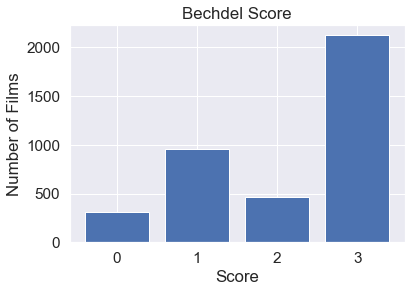

In [27]:
labels, counts = np.unique(rf_labels, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Bechdel Score')
plt.xlabel('Score')
plt.ylabel('Number of Films')

plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(rf_features, rf_labels,test_size=0.3)

print("After train-test splitting:")
print("Training data shape:",x_train.shape,"\nTraining label shape:", y_train.shape, "\nTest data shape:",x_test.shape, "\nTest label shape",y_test.shape)

After train-test splitting:
Training data shape: (2699, 6) 
Training label shape: (2699,) 
Test data shape: (1157, 6) 
Test label shape (1157,)


In [44]:
rf = RandomForestClassifier(n_estimators = 100)
#rf_best = SelectFromModel(rf)
rf.fit(x_train, y_train)
#rf.get_support()

RandomForestClassifier()

In [45]:
y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6032843560933449


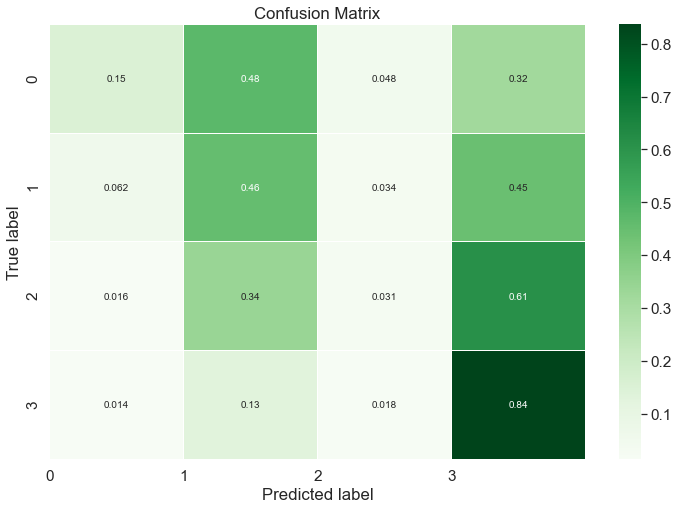

In [49]:
# Calculate and draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred).astype('float')
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['0', '1', '2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.31      0.15      0.21        84
         1.0       0.44      0.46      0.45       291
         2.0       0.13      0.03      0.05       127
         3.0       0.70      0.84      0.76       655

    accuracy                           0.60      1157
   macro avg       0.40      0.37      0.37      1157
weighted avg       0.54      0.60      0.56      1157



## Unequal Classes! What about undersampling


In [51]:
rf_features = bechdel_movies[["actor_mention_score",
                             "negative",
                             "positive",
                             "neutral",
                             "female_ratio",
                             "gender_density",
                             "bechdel_score"]]

rf_features = rf_features.dropna()

print("Print before undersampling", rf_features['bechdel_score'].value_counts())
rf_features = rf_features.groupby('bechdel_score').apply(lambda x: x.sample(n=min(300, len(x))))
print("Print after undersampling", rf_features['bechdel_score'].value_counts())

display(rf_features)

rf_features = rf_features.to_numpy()
rf_labels = rf_features[:,-1]
rf_features = rf_features[:,:-1]

Print before undersampling bechdel_score
3    2122
1     957
2     464
0     313
Name: count, dtype: int64
Print after undersampling bechdel_score
0    300
1    300
2    300
3    300
Name: count, dtype: int64


actor_mention_score  negative  positive   neutral  \
bechdel_score                                                           
0             3108               0.3333  0.542430  0.033447  0.424123   
              2320               0.0000  0.532448  0.034256  0.433296   
              2100               0.1020  0.388716  0.075960  0.535325   
              4117               0.0000  0.245626  0.058642  0.695732   
              4987               0.0000  0.399256  0.036462  0.564282   
...                                 ...       ...       ...       ...   
3             2146               1.0000  0.017052  0.197860  0.785087   
              890                0.5349  0.437847  0.051105  0.511048   
              494                1.0000  0.307975  0.072860  0.619165   
              2185               0.5385  0.086786  0.157419  0.755795   
              2165               0.1667  0.352693  0.037421  0.609885   

                    female_ratio  gender_density  bechdel_score  
bechdel_score                                                    
0             3108      0.500000        0.600000              0  
              2320      0.000000        0.000000              0  
              2100      0.250000        0.163265              0  
              4117      0.333333        0.500000              0  
              4987      0.000000        0.000000              0  
...                          ...             ...            ...  
3             2146      0.571429        1.000000              3  
              890       0.307692        0.724138              3  
              494       0.500000        0.000000              3  
              2185      0.583333        0.533333              3  
              2165      0.250000        0.384615              3  

[1200 rows x 7 columns]

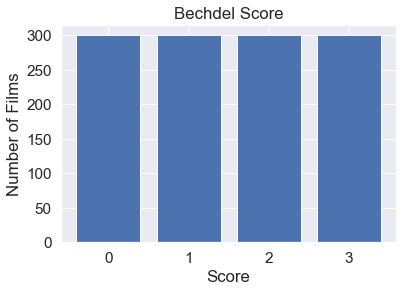

In [52]:
labels, counts = np.unique(rf_labels, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Bechdel Score')
plt.xlabel('Score')
plt.ylabel('Number of Films')

plt.show()

In [53]:
x_train, x_test, y_train, y_test = train_test_split(rf_features, rf_labels,test_size=0.3)

print("After train-test splitting:")
print("Training data shape:",x_train.shape,"\nTraining label shape:", y_train.shape, "\nTest data shape:",x_test.shape, "\nTest label shape",y_test.shape)

rf = RandomForestClassifier(n_estimators = 100)
#rf_best = SelectFromModel(rf)
rf.fit(x_train, y_train)
#rf.get_support()

y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

After train-test splitting:
Training data shape: (840, 6) 
Training label shape: (840,) 
Test data shape: (360, 6) 
Test label shape (360,)
Test Accuracy: 0.41388888888888886


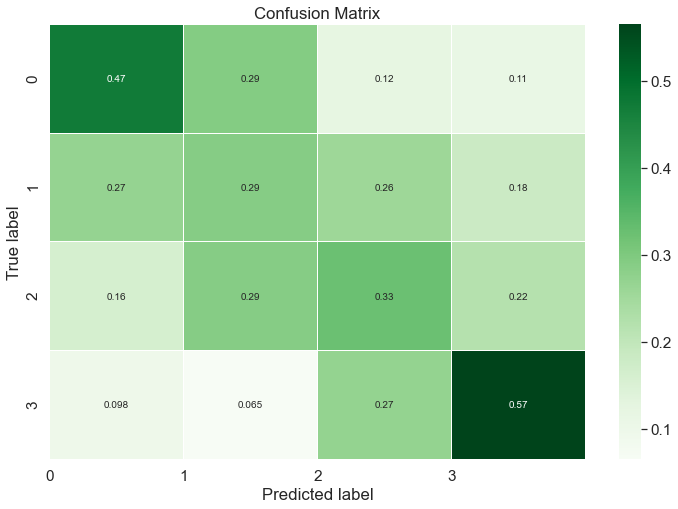

In [54]:
# Calculate and draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred).astype('float')
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['0', '1', '2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.47      0.47        89
         1.0       0.32      0.29      0.31        93
         2.0       0.32      0.33      0.32        86
         3.0       0.53      0.57      0.55        92

    accuracy                           0.41       360
   macro avg       0.41      0.41      0.41       360
weighted avg       0.41      0.41      0.41       360



## Opting for Binary Bechdel Test

We observe that for the cases where the movie passes 1 or 2 tests, it is hard to classify. For this reason, we may opt to look from a more rigid perspective and binarize the output labels as "Passed", or "Failed". The same analysis is carried out with the binary bechdel version.

In [56]:
rf_features = bechdel_movies[["actor_mention_score",
                             "negative",
                             "positive",
                             "neutral",
                             "female_ratio",
                             "gender_density",
                             "bechdel_binary"]]

rf_features = rf_features.dropna()

display(rf_features)

rf_features = rf_features.to_numpy()
rf_labels = rf_features[:,-1]
rf_features = rf_features[:,:-1]

,actor_mention_score,negative,positive,neutral,female_ratio,gender_density,bechdel_binary
0,0.2500,0.048826,0.120614,0.830560,0.150000,0.000000,1
1,0.5345,0.129004,0.179076,0.691920,0.461538,0.333333,1
2,0.2830,0.252773,0.112999,0.634228,0.428571,0.240000,1
5,1.0000,0.331542,0.086043,0.582415,0.250000,0.868421,1
7,0.2500,0.640489,0.023423,0.336088,0.285714,0.600000,0
...,...,...,...,...,...,...,...
5188,0.2222,0.333736,0.058590,0.607674,0.294118,0.636364,1
5189,0.7500,0.384289,0.049881,0.565830,0.235294,0.206897,0
5190,0.1667,0.131713,0.176800,0.691487,0.454545,0.055556,1
5191,0.5200,0.317630,0.097013,0.585357,0.285714,0.206897,1


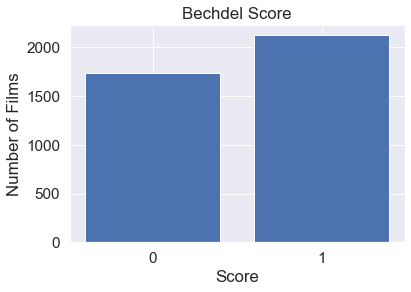

In [57]:
labels, counts = np.unique(rf_labels, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Bechdel Score')
plt.xlabel('Score')
plt.ylabel('Number of Films')

plt.show()

In [58]:
x_train, x_test, y_train, y_test = train_test_split(rf_features, rf_labels,test_size=0.3)

print("After train-test splitting:")
print("Training data shape:",x_train.shape,"\nTraining label shape:", y_train.shape, "\nTest data shape:",x_test.shape, "\nTest label shape",y_test.shape)

rf = RandomForestClassifier(n_estimators = 100)
#rf_best = SelectFromModel(rf)
rf.fit(x_train, y_train)
#rf.get_support()

y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

After train-test splitting:
Training data shape: (2699, 6) 
Training label shape: (2699,) 
Test data shape: (1157, 6) 
Test label shape (1157,)
Test Accuracy: 0.7113223854796888


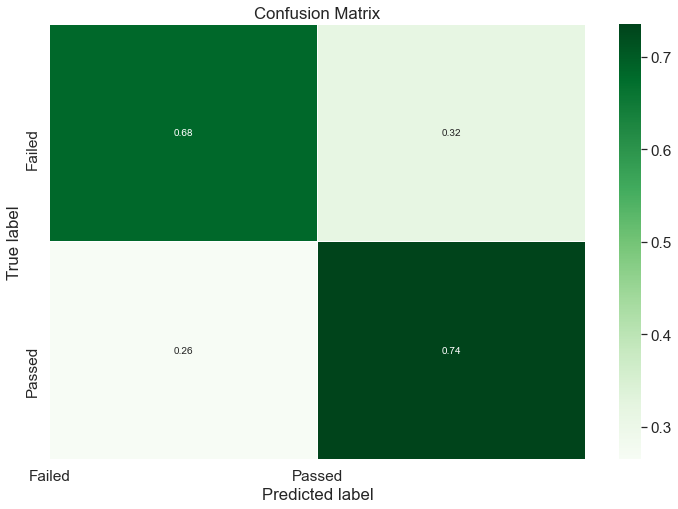

In [60]:
# Calculate and draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred).astype('float')
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Failed', 'Passed']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       534
         1.0       0.73      0.74      0.73       623

    accuracy                           0.71      1157
   macro avg       0.71      0.71      0.71      1157
weighted avg       0.71      0.71      0.71      1157



## Binary Bechdel with Undersampling

In [65]:
rf_features = bechdel_movies[["actor_mention_score",
                             "negative",
                             "positive",
                             "neutral",
                             "female_ratio",
                             "gender_density",
                             "bechdel_binary"]]

rf_features = rf_features.dropna()

print("Print before undersampling", rf_features['bechdel_binary'].value_counts())
rf_features = rf_features.groupby('bechdel_binary').apply(lambda x: x.sample(n=min(1700, len(x))))
print("Print after undersampling", rf_features['bechdel_binary'].value_counts())

display(rf_features)

rf_features = rf_features.to_numpy()
rf_labels = rf_features[:,-1]
rf_features = rf_features[:,:-1]

Print before undersampling bechdel_binary
1    2122
0    1734
Name: count, dtype: int64
Print after undersampling bechdel_binary
0    1700
1    1700
Name: count, dtype: int64


actor_mention_score  negative  positive   neutral  \
bechdel_binary                                                           
0              907                0.1905  0.290911  0.033665  0.675424   
               751                0.3750  0.326625  0.031359  0.642016   
               2279               0.0000  0.152648  0.154211  0.693141   
               4603               0.1000  0.204659  0.141828  0.653513   
               4644               0.3793  0.331661  0.093130  0.575209   
...                                  ...       ...       ...       ...   
1              2953               1.0000  0.013276  0.708365  0.278359   
               3692               0.4688  0.106584  0.216888  0.676527   
               829                0.4091  0.295155  0.062395  0.642450   
               2104               0.0000  0.512271  0.042734  0.444995   
               1674               0.5806  0.054083  0.294167  0.651750   

                     female_ratio  gender_density  bechdel_binary  
bechdel_binary                                                     
0              907       0.200000        0.555556               0  
               751       0.200000        0.600000               0  
               2279      0.285714        0.000000               0  
               4603      0.181818        0.076923               0  
               4644      0.450000        0.304348               0  
...                           ...             ...             ...  
1              2953      0.555556        1.000000               1  
               3692      0.272727        0.736842               1  
               829       0.266667        0.388889               1  
               2104      0.166667        0.583333               1  
               1674      0.500000        0.890909               1  

[3400 rows x 7 columns]

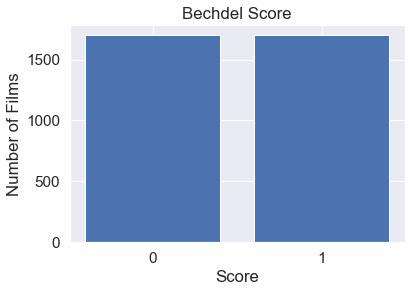

In [66]:
labels, counts = np.unique(rf_labels, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Bechdel Score')
plt.xlabel('Score')
plt.ylabel('Number of Films')

plt.show()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(rf_features, rf_labels,test_size=0.3)

print("After train-test splitting:")
print("Training data shape:",x_train.shape,"\nTraining label shape:", y_train.shape, "\nTest data shape:",x_test.shape, "\nTest label shape",y_test.shape)

rf = RandomForestClassifier(n_estimators = 100)
#rf_best = SelectFromModel(rf)
rf.fit(x_train, y_train)
#rf.get_support()

y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

After train-test splitting:
Training data shape: (2380, 6) 
Training label shape: (2380,) 
Test data shape: (1020, 6) 
Test label shape (1020,)
Test Accuracy: 0.711764705882353


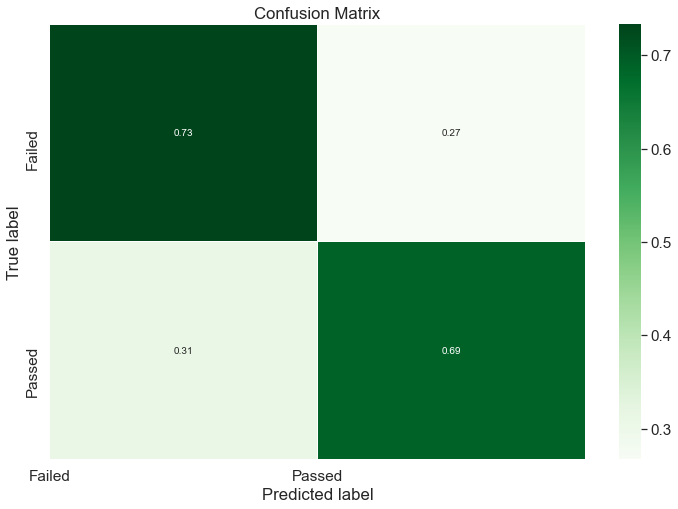

In [68]:
# Calculate and draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred).astype('float')
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Failed', 'Passed']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       513
         1.0       0.72      0.69      0.70       507

    accuracy                           0.71      1020
   macro avg       0.71      0.71      0.71      1020
weighted avg       0.71      0.71      0.71      1020



## Linear Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rf_features, rf_labels, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.1818081342993504, 0.2667388113211385)

In [23]:
bechdel_movies

,5. Movie box office revenue,6. Movie runtime,actor_mention_score,negative,neutral,positive,female_ratio,gender_density
0,10161099.0,137.0,0.2500,0.048826,0.830560,0.120614,0.150000,0.000000
1,102272727.0,139.0,0.5345,0.129004,0.691920,0.179076,0.461538,0.333333
2,3960327.0,98.0,0.2830,0.252773,0.634228,0.112999,0.428571,0.240000
5,4000000.0,176.0,1.0000,0.331542,0.582415,0.086043,0.250000,0.868421
7,4650000.0,96.0,0.2500,0.640489,0.336088,0.023423,0.285714,0.600000
...,...,...,...,...,...,...,...,...
5188,494471524.0,113.0,0.2222,0.333736,0.607674,0.058590,0.294118,0.636364
5189,147332697.0,93.0,0.7500,0.384289,0.565830,0.049881,0.235294,0.206897
5190,2158775.0,118.0,0.1667,0.131713,0.691487,0.176800,0.454545,0.055556
5191,288752301.0,117.0,0.5200,0.317630,0.585357,0.097013,0.285714,0.206897
